# PISA 2012 Data Exploration
## by Elisa Richter

## Preliminary Wrangling

This notebooks shows the analysis of 2012 PISA data in regards to the impact of certain variables on the PISA results.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('pisa2012.csv', encoding = 'cp1252')

C:\Users\elisa\AppData\Local\conda\conda\envs\my env\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', 636)
pd.set_option('display.max_colwidth', -1)
df.head(1)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [4]:
df.shape

(485490, 636)

### What is the structure of your dataset?

The dataset consists of 485,490 rows and 636 columns. 

### What is/are the main feature(s) of interest in your dataset?

The number of variables is far to big to take all into consideration with just a small analysis. The main feature is of course the result of every student in the PISA test.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I will have a look, what effect the availability of a electronic devices and usage of the internet has on the students' PISA results.

In addition I will analyse if there are any suprinsing effects coming from the familiy situation, i.e. if mother and/or father are living together with the student.

The PISA test is divided into 3 general sections: math, reading and science. Math is again divided into several subsections. For the purpose of this analysis I will only use the results from the general sections.

There are 5 scores available for every general section. To get a result for one I calculate the mean of that 5 scores. Afterwards - to get an overall score -  I calculate the mean of the 3 general section.

In [5]:
#Means of general sections and overall
df['avg_math'] = df[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].mean(axis = 1)
df['avg_read'] = df[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].mean(axis = 1)
df['avg_scie'] = df[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].mean(axis = 1)
df['avg_overall'] = df[['avg_math', 'avg_read', 'avg_scie']].mean(axis = 1)

To investigate the data and find the answers to the stated questions, I will built subsets.

For the data regarding usage of electronic devices and internet, I will generate the data frame 'df_pc'.

In [6]:
pc_columns1 = list(df.iloc[:, 284:333].columns.values)
pc_columns2 = list(df.iloc[:, 636:640].columns.values)
pc_columns3 = list(df.iloc[:, 12:13].columns.values)
pc_columns4 = list(df.iloc[:, 4:5].columns.values)
pc_columns5 = list(df.iloc[:, 21:23].columns.values)
pc_columns = pc_columns1 + pc_columns2 + pc_columns3 + pc_columns4 + pc_columns5
df_pc = df.loc[:,pc_columns]
df_pc.sample(5)

,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,avg_math,avg_read,avg_scie,avg_overall,ST04Q01,OECD,ST11Q01,ST11Q02
368011,"Yes, but I don’t use it","Yes, and I use it","Yes, and I use it","Yes, and I use it","Yes, and I use it","Yes, but I don’t use it","Yes, and I use it","Yes, and I use it","Yes, and I use it","Yes, and I use it","Yes, but I don’t use it","Yes, and I use it","Yes, and I use it",No,"Yes, and I use it","Yes, and I use it","Yes, and I use it",No,7-9 years old,7-9 years old,2,5,4,Never or hardly ever,Never or hardly ever,Once or twice a week,Once or twice a month,Almost every day,Almost every day,Almost every day,Once or twice a month,Once or twice a week,Never or hardly ever,Almost every day,Almost every day,Once or twice a month,Once or twice a month,Once or twice a week,Almost every day,Never or hardly ever,Once or twice a month,Once or twice a month,Once or twice a week,Once or twice a week,Once or twice a week,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a week,609.44852,622.26650,596.92278,609.545933,Female,OECD,Yes,Yes
427648,No,"Yes, and I use it",No,"Yes, and I use it","Yes, but I don’t use it","Yes, but I don’t use it","Yes, and I use it","Yes, and I use it","Yes, and I use it","Yes, and I use it",No,"Yes, but I don’t use it","Yes, and I use it",No,"Yes, but I don’t use it","Yes, and I use it",No,No,7-9 years old,7-9 years old,4,4,1,Never or hardly ever,Never or hardly ever,Once or twice a week,Almost every day,Every day,Almost every day,Once or twice a week,Almost every day,Almost every day,Once or twice a week,Once or twice a week,Once or twice a week,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a week,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,537.08520,534.79890,554.96084,542.281647,Male,Non-OECD,Yes,Yes
312950,"Yes, and I use it",No,"Yes, but I don’t use it","Yes, and I use it","Yes, and I use it",No,"Yes, and I use it","Yes, and I use it",No,"Yes, and I use it",No,"Yes, and I use it",No,No,No,No,No,No,10-12 years old,10-12 years old,1,3,5,Never or hardly ever,Never or hardly ever,Every day,Every day,Every day,Every day,Almost every day,Almost every day,Once or twice a month,Never or hardly ever,Once or twice a month,Once or twice a week,Never or hardly ever,Never or hardly ever,Never or hardly ever,Once or twice a week,Once or twice a week,Never or hardly ever,Never or hardly ever,Never or hardly ever,Once or twice a week,Once or twice a week,Never or hardly ever,Never or hardly ever,Never or hardly ever,Once or twice a month,571.67004,593.27416,568.76166,577.901953,Female,Non-OECD,No,No
84858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,97,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,543.39464,580.96236,606.43418,576.930393,Female,OECD,Yes,Yes
166638,"Yes, and I use it","Yes, and I use it",No,"Yes, and I use it",No,"Yes, and I use it",No,"Yes, but I don’t use it","Yes, and I use it","Yes, and I use it",No,"Yes, and I use it","Yes, and I use it",No,"Yes, and I use it","Yes, but I don’t use it","Yes, but I don’t use it",No,7-9 years old,7-9 years old,4,4,5,Never or hardly ever,Never or hardly ever,Once or twice a month,Almost every day,Every day,Never or hardly ever,Never or hardly ever,Never or hardly ever,Once or twice a month,Never or hardly ever,Once or twice a week,Never or hardly ever,Never or hardly ever,Never 

In [7]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 57 columns):
IC01Q01        296977 non-null object
IC01Q02        297068 non-null object
IC01Q03        295602 non-null object
IC01Q04        297305 non-null object
IC01Q05        296587 non-null object
IC01Q06        294773 non-null object
IC01Q07        296116 non-null object
IC01Q08        297109 non-null object
IC01Q09        296855 non-null object
IC01Q10        297451 non-null object
IC01Q11        295118 non-null object
IC02Q01        296975 non-null object
IC02Q02        295618 non-null object
IC02Q03        294625 non-null object
IC02Q04        296944 non-null object
IC02Q05        296167 non-null object
IC02Q06        295830 non-null object
IC02Q07        294249 non-null object
IC03Q01        293216 non-null object
IC04Q01        296305 non-null object
IC05Q01        485490 non-null int64
IC06Q01        485490 non-null int64
IC07Q01        485490 non-null int64
IC08Q01        294

This data frame contains a lot of missing values. They will be dropped to continue the analysis.

In [8]:
df_pc.dropna(inplace=True)

In [9]:
df_pc.shape[0]

229681

Although I had to drop a lot of rows, there are still 247,939 observations left to analyse.
To make the data easier to analyse I will change the column names of df_pc. They should still be as short as possible. Therefore, I will use the following abbreviations:
- ah - at home
- oos - out of school
- as - at school

In [10]:
df_pc.columns = ['ah_desktop_computer', 
                 'ah_portable_laptop',
                 'ah_tablet_computer',
                 'ah_internet_connection',
                 'ah_video_games_console',
                 'ah_cell_phone_wo_internet',
                 'ah_cell_phone_w_internet',
                 'ah_mp3_mp4_player',
                 'ah_printer',
                 'ah_usb',
                 'ah_ebook_reader',
                 'as_desktop_computer',
                 'as_portable_laptop',
                 'as_tablet_computer',
                 'as_internet_connection',
                 'as_printer',
                 'as_usb',
                 'as_ebook_reader',
                 'first_use_computer',
                 'first_access_internet',
                 'internet_at_school',
                 'internet_oos_weekday',
                 'internet_oos_weekend',
                 'oos_one_player_games',
                 'oos_collabourative_games',
                 'oos_use_email',
                 'oos_chat_on_line',
                 'oos_social_networks',
                 'oos_browse_internet_for_fun',
                 'oos_read_news',
                 'oos_obtain_information',
                 'oos_download_music',
                 'oos_upload_content',
                 'oos_internet_for_school',
                 'oos_email_students',
                 'oos_email_teachers',
                 'oos_download_from_school',
                 'oos_announcements',
                 'oos_homework',
                 'oos_share_school_material',
                 'as_chat_on_line',
                 'as_email',
                 'as_browse_for_schoolwork',
                 'as_download_from_website',
                 'as_post_on_website',
                 'as_simulations',
                 'as_practice_and_drilling',
                 'as_homework',
                 'as_group_work',
                 'avg_math',
                 'avg_read',
                 'avg_scie',
                 'avg_overall',
                 'gender',
                 'OECD',
                 'ah_mother',
                 'ah_father']
df_pc.sample(5)

,ah_desktop_computer,ah_portable_laptop,ah_tablet_computer,ah_internet_connection,ah_video_games_console,ah_cell_phone_wo_internet,ah_cell_phone_w_internet,ah_mp3_mp4_player,ah_printer,ah_usb,ah_ebook_reader,as_desktop_computer,as_portable_laptop,as_tablet_computer,as_internet_connection,as_printer,as_usb,as_ebook_reader,first_use_computer,first_access_internet,internet_at_school,internet_oos_weekday,internet_oos_weekend,oos_one_player_games,oos_collabourative_games,oos_use_email,oos_chat_on_line,oos_social_networks,oos_browse_internet_for_fun,oos_read_news,oos_obtain_information,oos_download_music,oos_upload_content,oos_internet_for_school,oos_email_students,oos_email_teachers,oos_download_from_school,oos_announcements,oos_homework,oos_share_school_material,as_chat_on_line,as_email,as_browse_for_schoolwork,as_download_from_website,as_post_on_website,as_simulations,as_practice_and_drilling,as_homework,as_group_work,avg_math,avg_read,avg_scie,avg_overall,gender,OECD,ah_mother,ah_father
156591,No,"Yes, and I use it","Yes, and I use it","Yes, and I use it","Yes, and I use it","Yes, and I use it",No,"Yes, and I use it","Yes, and I use it","Yes, and I use it",No,No,"Yes, but I don’t use it",No,"Yes, and I use it","Yes, and I use it",No,No,7-9 years old,13 years old or older,2,1,4,Once or twice a week,Once or twice a month,Once or twice a week,Once or twice a week,Once or twice a week,Almost every day,Once or twice a month,Once or twice a month,Once or twice a week,Never or hardly ever,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Once or twice a month,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,525.40118,430.54604,518.59380,491.513673,Male,OECD,Yes,Yes
246060,No,"Yes, and I use it",No,"Yes, and I use it",No,"Yes, and I use it",No,"Yes, and I use it","Yes, and I use it","Yes, and I use it",No,"Yes, but I don’t use it",No,No,"Yes, but I don’t use it",No,No,No,6 years old or younger,7-9 years old,1,2,2,Never or hardly ever,Never or hardly ever,Never or hardly ever,Once or twice a week,Almost every day,Never or hardly ever,Never or hardly ever,Once or twice a week,Almost every day,Almost every day,Never or hardly ever,Never or hardly ever,Never or hardly ever,Once or twice a month,Never or hardly ever,Never or hardly ever,Once or twice a week,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,414.79202,459.03576,425.34502,433.057600,Female,OECD,Yes,Yes
147458,"Yes, and I use it","Yes, and I use it",No,"Yes, and I use it","Yes, and I use it","Yes, and I use it",No,"Yes, and I use it","Yes, and I use it","Yes, and I use it",No,"Yes, and I use it",No,No,"Yes, and I use it","Yes, but I don’t use it","Yes, but I don’t use it",No,10-12 years old,10-12 years old,1,1,3,Never or hardly ever,Never or hardly ever,Once or twice a week,Never or hardly ever,Once or twice a week,Once or twice a week,Never or hardly ever,Once or twice a week,Once or twice a week,Never or hardly ever,Once or twice a week,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Never or hardly ever,Once or twice a month,576.96680,587.87286,589.27640,584.705353,Female,OECD,Yes,Yes
443506,"Yes, and I use it","Yes, and I use it",No,"Yes, and I use it",No,No,"Yes, and I use it","Yes, and I use it","Yes, and I use it","Yes, and I use it",No,"Yes, but I don’t use it",No,No,"Yes, and I use it","Yes, and I use it",No,No,7-9 years old,10-12 years old,3,4,5,Once or twice a month,Once or twice a month,Once 

In [11]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229681 entries, 22151 to 475552
Data columns (total 57 columns):
ah_desktop_computer            229681 non-null object
ah_portable_laptop             229681 non-null object
ah_tablet_computer             229681 non-null object
ah_internet_connection         229681 non-null object
ah_video_games_console         229681 non-null object
ah_cell_phone_wo_internet      229681 non-null object
ah_cell_phone_w_internet       229681 non-null object
ah_mp3_mp4_player              229681 non-null object
ah_printer                     229681 non-null object
ah_usb                         229681 non-null object
ah_ebook_reader                229681 non-null object
as_desktop_computer            229681 non-null object
as_portable_laptop             229681 non-null object
as_tablet_computer             229681 non-null object
as_internet_connection         229681 non-null object
as_printer                     229681 non-null object
as_usb               

In [12]:
df_pc.iloc[:, 0:18].nunique()

ah_desktop_computer          3
ah_portable_laptop           3
ah_tablet_computer           3
ah_internet_connection       3
ah_video_games_console       3
ah_cell_phone_wo_internet    3
ah_cell_phone_w_internet     3
ah_mp3_mp4_player            3
ah_printer                   3
ah_usb                       3
ah_ebook_reader              3
as_desktop_computer          3
as_portable_laptop           3
as_tablet_computer           3
as_internet_connection       3
as_printer                   3
as_usb                       3
as_ebook_reader              3
dtype: int64

Every variable from above ca have 3 different values. According to the 'PISA 2012 Technical Report' this is the right amount. These columns seem to be clean.

In [13]:
df_pc.iloc[:, 18:20].nunique()

first_use_computer       5
first_access_internet    5
dtype: int64

Every variable from above ca have 5 different values. According to the 'PISA 2012 Technical Report' this is the right amount. These columns seem to be clean.

In [14]:
df_pc.iloc[:, 20:23].nunique()

internet_at_school      10
internet_oos_weekday    10
internet_oos_weekend    10
dtype: int64

Due to 'PISA 2012 Technical Report' I was expecting 7 different possible values. In addition, this variables should not be of data type integer, but string/object.

In [15]:
df_pc['internet_at_school'].unique()

array([ 3,  5,  4,  2,  6,  1,  7, 98, 99, 97], dtype=int64)

In [16]:
df_pc['internet_oos_weekday'].unique()

array([ 4,  6,  7,  5,  2,  3,  1, 98, 99, 97], dtype=int64)

In [17]:
df_pc['internet_oos_weekend'].unique()

array([ 4,  6,  7,  5,  3,  2,  1, 99, 98, 97], dtype=int64)

In [18]:
df_pc.query('internet_at_school > 7 | internet_oos_weekday >7 | internet_oos_weekend > 7')['internet_at_school'].count()

2781

According to the Technical Report there shouldn't be values greater than seven. Therefore I will drop that rows as well.

In [19]:
df_pc = df_pc.query('internet_at_school <= 7 & internet_oos_weekday <= 7 & internet_oos_weekend <= 7')
df_pc.shape[0]

226900

There are still enough observations left to continue the analysis.
Next I will change the integers of that cells to strings.

In [20]:
mapping = {1 : 'No time', 2: '1-30 minutes', 3:'31-60 minutes', 4:'Between 1 and 2 hours', 5:'Between 2 and 4 hours', 6:'Between 4 and 6 hours', 7:'More than 6 hours'}
df_pc.replace({'internet_at_school': mapping, 'internet_oos_weekday': mapping, 'internet_oos_weekend': mapping}, inplace = True)

In [21]:
df_pc.iloc[:, 20:23].nunique()

internet_at_school      7
internet_oos_weekday    7
internet_oos_weekend    7
dtype: int64

Now I continue to check if the content of the rest of the columns is clean.

In [22]:
df_pc.iloc[:, 23:49].nunique()

oos_one_player_games           5
oos_collabourative_games       5
oos_use_email                  5
oos_chat_on_line               5
oos_social_networks            5
oos_browse_internet_for_fun    5
oos_read_news                  5
oos_obtain_information         5
oos_download_music             5
oos_upload_content             5
oos_internet_for_school        5
oos_email_students             5
oos_email_teachers             5
oos_download_from_school       5
oos_announcements              5
oos_homework                   5
oos_share_school_material      5
as_chat_on_line                5
as_email                       5
as_browse_for_schoolwork       5
as_download_from_website       5
as_post_on_website             5
as_simulations                 5
as_practice_and_drilling       5
as_homework                    5
as_group_work                  5
dtype: int64

Every variable from above has 5 different values. According to the 'PISA 2012 Technical Report' this is the right amount. These columns seem to be clean.

In the end I will change now every varaible with data type string/object into the categorical data type.

In [23]:
order1 = ['No', "Yes, but I don’t use it", 'Yes, and I use it']
order2 = ['6 years old or younger', '7-9 years old',
          '10-12 years old', '13 years old  or older', 'Never']
order3 = ['No time', '1-30 minutes', '31-60 minutes', 'Between 1 and 2 hours',
          'Between 2 and 4 hours', 'Between 4 and 6 hours', 'More than 6 hours']
order4 = ['Never or hardly ever', 'Once or twice a month', 'Once or twice a week',
          'Almost every day', 'Every day']
order5 = ['Female', 'Male']
order6 = ['OECD', 'Non-OECD']
order7 = ['Yes', 'No']

new_class1 = pd.api.types.CategoricalDtype(ordered = True, categories = order1)
new_class2 = pd.api.types.CategoricalDtype(ordered = True, categories = order2)
new_class3 = pd.api.types.CategoricalDtype(ordered = True, categories = order3)
new_class4 = pd.api.types.CategoricalDtype(ordered = True, categories = order4)
new_class5 = pd.api.types.CategoricalDtype(ordered = False, categories = order5)
new_class6 = pd.api.types.CategoricalDtype(ordered = False, categories = order6)
new_class7 = pd.api.types.CategoricalDtype(ordered = False, categories = order7)

list1 = list(df_pc.iloc[:, 0:18].columns.values)
list2 = list(df_pc.iloc[:, 18:20].columns.values)
list3 = list(df_pc.iloc[:, 20:23].columns.values)
list4 = list(df_pc.iloc[:, 23:49].columns.values)
list5 = list(df_pc.iloc[:, 53:54].columns.values)
list6 = list(df_pc.iloc[:, 54:55].columns.values)
list7 = list(df_pc.iloc[:, 55:57].columns.values)

for item in list1:
    df_pc[item] = df_pc[item].astype(new_class1)
    
for item in list2:
    df_pc[item] = df_pc[item].astype(new_class2)
    
for item in list3:
    df_pc[item] = df_pc[item].astype(new_class3)
    
for item in list4:
    df_pc[item] = df_pc[item].astype(new_class4)

for item in list5:
    df_pc[item] = df_pc[item].astype(new_class5)    

for item in list6:
    df_pc[item] = df_pc[item].astype(new_class6)    

for item in list7:
    df_pc[item] = df_pc[item].astype(new_class7)   

In [24]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226900 entries, 22151 to 475552
Data columns (total 57 columns):
ah_desktop_computer            226900 non-null category
ah_portable_laptop             226900 non-null category
ah_tablet_computer             226900 non-null category
ah_internet_connection         226900 non-null category
ah_video_games_console         226900 non-null category
ah_cell_phone_wo_internet      226900 non-null category
ah_cell_phone_w_internet       226900 non-null category
ah_mp3_mp4_player              226900 non-null category
ah_printer                     226900 non-null category
ah_usb                         226900 non-null category
ah_ebook_reader                226900 non-null category
as_desktop_computer            226900 non-null category
as_portable_laptop             226900 non-null category
as_tablet_computer             226900 non-null category
as_internet_connection         226900 non-null category
as_printer                     226900 non-nul

## Univariate Exploration

First, I will take a look into the distribution of the use of internet use and electronic devices within the data.

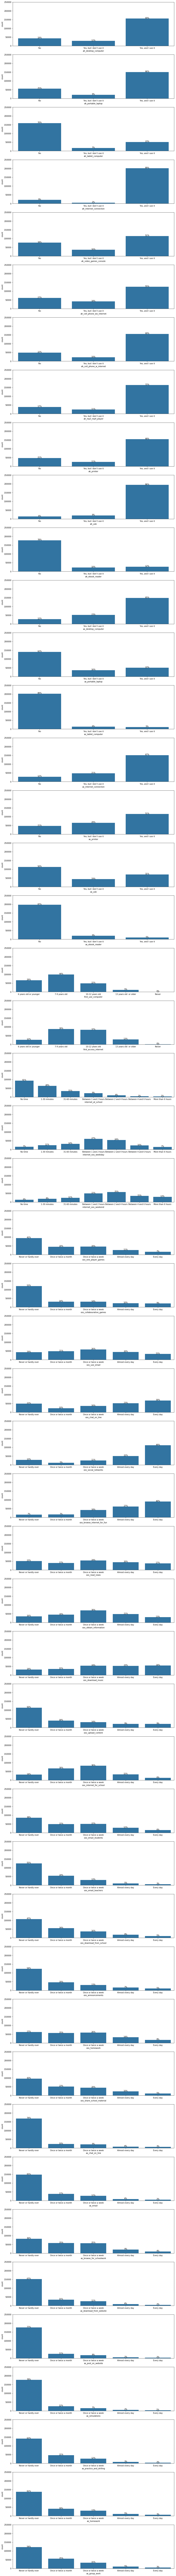

In [25]:
base_color = sb.color_palette()[0]

var_list = list(df_pc.columns.values)[0:-8]
rows = int(len(var_list))
plt.figure(figsize = [15,rows*5])

for var in var_list:
    plt.subplot(rows, 1, var_list.index(var) +1)
    sb.countplot(data = df_pc, x = var, color = base_color)
    axes = plt.gca()
    axes.set_ylim([0, 250000])
    
    #add annotations
    n_points = df_pc.shape[0]
    cat_counts = df_pc[var].value_counts()
    locs, labels = plt.xticks()
    
    #loop through each pair of location and label
    for loc, label in zip(locs, labels):
        count = cat_counts[label.get_text()]
        pct_string = '{:0.0f}%'.format(100*count/n_points)
        plt.text(loc, count-8, pct_string, ha = 'center')

The distribution of the variable ‘ah_desktop_computer’ is pretty similar the one of ‘ah_portable_laptop’. 66%/68% students use one of these devices at home. That leaves still about more than 30% without a computer or not using it.
Tablet computers and e-book readers are not that common to have at home. 
55% are using a cell phone without internet connection. But 68% use one with internet connection. The numbers are kind of contradicting. 
The other electronic devices are quite common at home, with minimum values of 50%.

65% of the students use a desktop computer at school. Additional 23% have access to them but are not using it. Laptops, tablets, and e-book readers are not that common to have at school.
665 of the students use the internet at school. Printers and USB devices are used by half or less.

The distribution of ‘first_use_computer’ and ‘first_access_internet’ look quite similar and is right-skewed. 72% of the students used a computer and 51% used the internet before their 10th birthday. 
The distribution of the time that internet is used at school is right-skewed. 41% don’t use it at school at all.
‘Internet_oos_weekday’ and ‘internet_oos_weekend’ are similarly distributed. Both are slightly skewed to the left.
More than 40% don’t play computer games at all. About 20% play them at least almost every day.
At least 80% of the students use social networks and browses the internet for fun. 
Emails are not a very common tool for communication. Even less if the addressee is a teacher.
More than 30% is downloading and sharing material from school at least once a week.
The internet at school is mainly used for browsing for schoolwork.

Next I will have a look at the gender of the participating students in the df_pc subset.

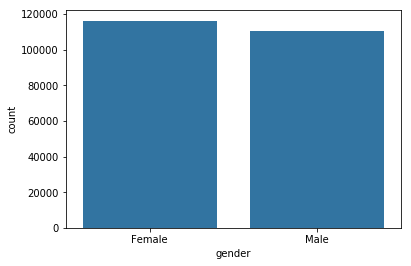

In [26]:
sb.countplot(data = df_pc, x = df_pc['gender'], color = base_color);

There is an almost equal number of both genders.

As last part of the univariate exploration I will explore the columns 'avg_math', 'avg_read', 'avg_scie', and 'avg_overall'.

In [27]:
df_pc['avg_overall'].mean()

503.8332474098135

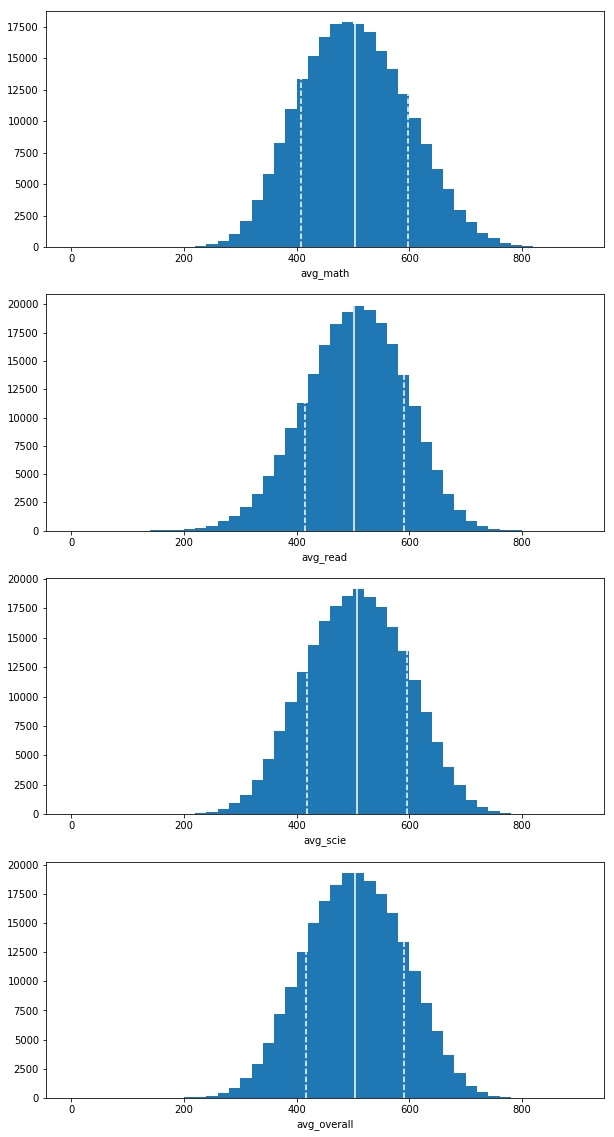

In [28]:
base_color = sb.color_palette()[0]

var_list = list(df_pc.columns.values)[49:53]
rows = int(len(var_list))
plt.figure(figsize = [10,rows*5])
bin_edges = np.arange(0, max(df_pc['avg_math'].max(), df_pc['avg_read'].max(),
                      df_pc['avg_scie'].max(), df_pc['avg_overall'].max())+1, 20)

for var in var_list:
    mean_var = df_pc[var].mean()
    std_var = df_pc[var].std()
    plt.subplot(rows, 1, var_list.index(var) +1)
    sb.distplot(df_pc[var], kde = False, bins = bin_edges, hist_kws = {'alpha': 1})
    axes = plt.gca()
    axes.axvline(x = mean_var, ymin=0, ymax=1, color = 'w')
    axes.axvline(x = mean_var - std_var, ymin=0, ymax=1, color = 'w', linestyle = '--')
    axes.axvline(x = mean_var + std_var, ymin=0, ymax=1, color = 'w', linestyle = '--')

All four results variables are normally distributed. As expected from a normal distribution the means are in the middle. The mean of all four variables seems to be very similar. Only 'avg_math' has a slightly greater standard deviation.

In the next step of the analysis I will look into relationsships between the variables I just examined.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The columns 'internet_at_school', 'internet_oos_weekday', and 'internet_oos_weekend' contained not ony values from 1 to 7, as stated by the PISA 2012 Technical Report. There were also values of 97, 98, and 99 in some cells. I dropped the observation with such values and still hat enough left to continue the analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I changed most of the data types in the investigated subset 'df_pc' into the categorical data type. Except for the PISA result columns, which were correctly created as floats.

## Bivariate Exploration

First I will have a look at the different result for male and female students.

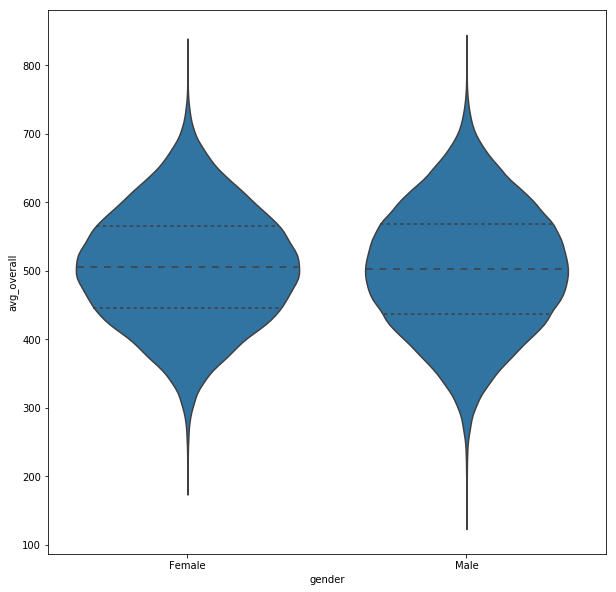

In [29]:
plt.figure(figsize = [10,10])
sb.violinplot(data = df_pc, x = 'gender', y = 'avg_overall', color = base_color, inner = 'quartiles');

The distribution seem pretty similar although the female's violin looks slightly wider.

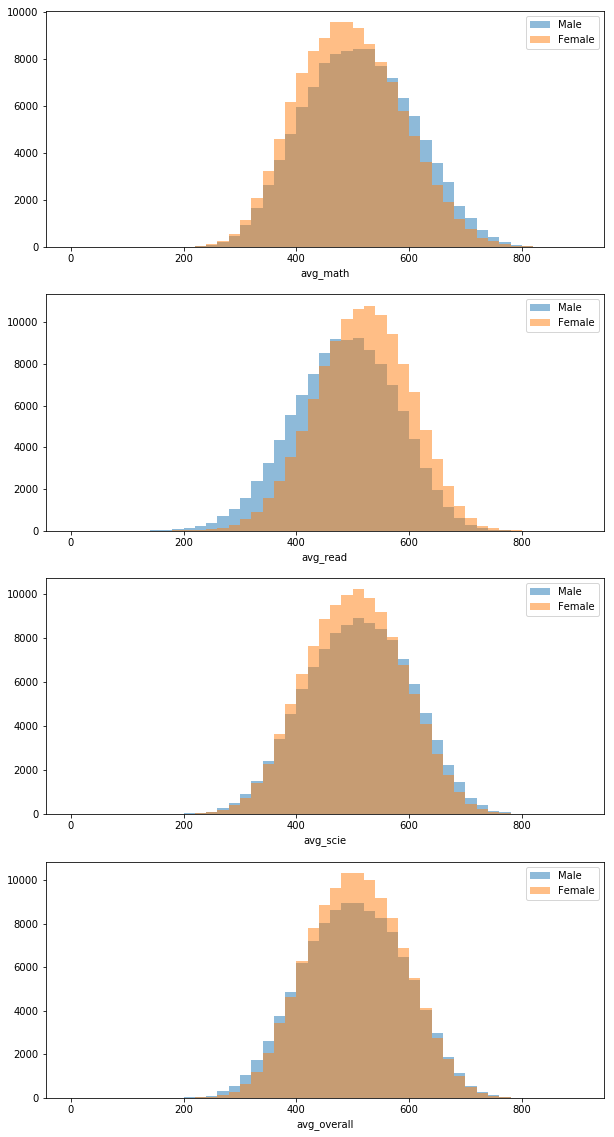

In [30]:
var_list = list(df_pc.columns.values)[49:53]
rows = int(len(var_list))
plt.figure(figsize = [10,rows*5])
bin_edges_ = np.arange(0, max(df_pc['avg_math'].max(), df_pc['avg_read'].max(),
                              df_pc['avg_scie'].max(), df_pc['avg_overall'].max())+1, 1)

df_pc_male = df_pc[df_pc['gender'] == 'Male']
df_pc_female = df_pc[df_pc['gender'] == 'Female']

for var in var_list:
    plt.subplot(rows, 1, var_list.index(var) +1)
    mean_male = df_pc_male['avg_overall'].mean()
    mean_female = df_pc_female['avg_overall'].mean()
    sb.distplot(df_pc_male[var], kde = False, bins = bin_edges, hist_kws = {'alpha': 0.5}, label = 'Male')
    sb.distplot(df_pc_female[var], kde = False, bins = bin_edges, hist_kws = {'alpha': 0.5}, label = 'Female')
    axes.axvline(x = mean_male, ymin=0, ymax=1, color = 'b')
    axes.axvline(x = mean_female, ymin=0, ymax=1, color = 'b')
    plt.legend()

For all four variables the female students results are more concentrated in the middle of the distribution. In math and since the male students have slightly better results, whereas in the females reached better results in reading.

Next, I will check if there is a realtionship between 'avg_math', 'avg_read', and 'avg_scie'.

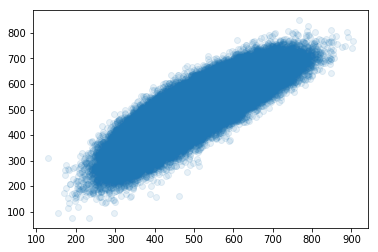

In [31]:
plt.scatter(data = df_pc, x = df_pc['avg_math'], y = df_pc['avg_read'], alpha = 0.1);

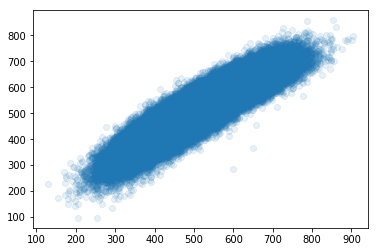

In [32]:
plt.scatter(data = df_pc, x = df_pc['avg_math'], y = df_pc['avg_scie'], alpha = 0.1);

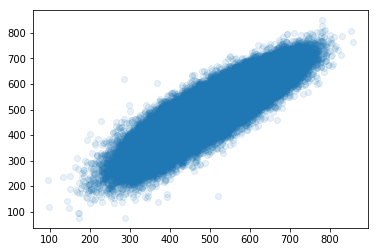

In [33]:
plt.scatter(data = df_pc, x = df_pc['avg_scie'], y = df_pc['avg_read'], alpha = 0.1);

As expected, all three results have a positive linear correlation.

Now I will have a look, if there is a realtionship between the usage of electronic devices/internet and the results in the PISA test.

For easier interpretation I will put the 'No' and 'Yes, but I don't use it' counts of the following variables together into one category 'No':
- ah_desktop_computer
- ah_portable_laptop
- ah_tablet_computer
- ah_internet_connection
- ah_video_games_console
- ah_cell_phone_wo_internet
- ah_cell_phone_w_internet
- ah_mp3_mp4_player
- ah_printer
- ah_usb
- ah_ebook_reader
- as_desktop_computer
- as_portable_laptop
- as_tablet_computer
- as_internet_connection
- as_printer
- as_usb
- as_ebook_reader

In [34]:
var_list = ['ah_desktop_computer', 'ah_portable_laptop', 'ah_tablet_computer', 'ah_internet_connection',
            'ah_video_games_console', 'ah_cell_phone_wo_internet', 'ah_cell_phone_w_internet', 'ah_mp3_mp4_player', 
            'ah_printer', 'ah_usb', 'ah_ebook_reader', 'as_desktop_computer', 'as_portable_laptop', 'as_tablet_computer',
            'as_internet_connection', 'as_printer', 'as_usb', 'as_ebook_reader']
map_dict = {'No' : 'No', "Yes, but I don’t use it": 'No', 'Yes, and I use it': 'Yes, and I use it'}

for var in var_list:
    df_pc[var] = df_pc[var].map(map_dict)

In [35]:
#put the categories into an order again
order = ['No', 'Yes, and I use it']
new_class = pd.api.types.CategoricalDtype(ordered = True, categories = order)
list_var = list(df_pc.iloc[:, 0:18].columns.values)

for item in list_var:
    df_pc[item] = df_pc[item].astype(new_class) 

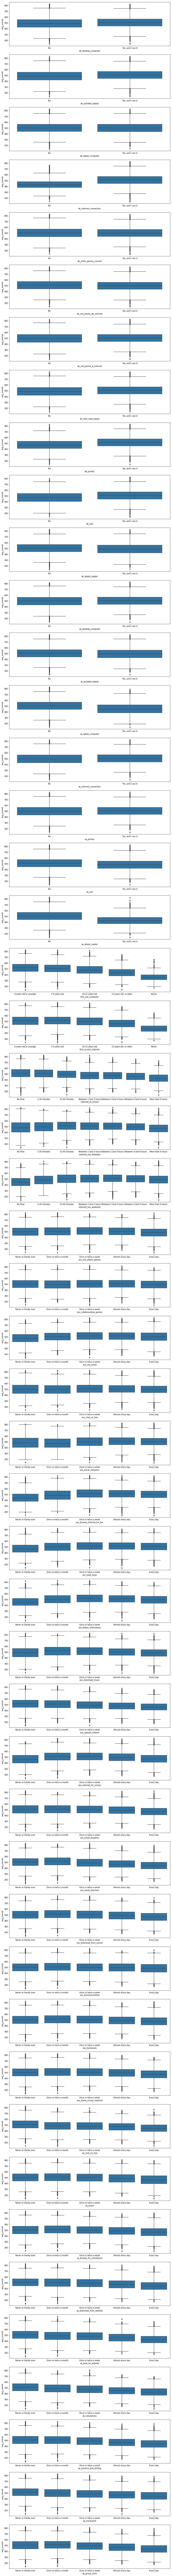

In [36]:
base_color = sb.color_palette()[0]

var_list = list(df_pc.columns.values)[0:-8]
rows = int(len(var_list))
plt.figure(figsize = [15,rows*5])

for var in var_list:
    plt.subplot(rows, 1, var_list.index(var) +1)
    sb.boxplot(data = df_pc, x = var, y = 'avg_overall', color = base_color, whis = 1.5)

The following impacts can be derived from the visualizations:

positive impact:
- ah_internet_connection
- ah_printer
- ah_usb

negative impact:
- as_tablet_computer
- as_usb
- as_ebook_reader
- internet_at_school
- as_chat_on_line
- as_post_on_website
- as_simulations
- as_homework

first_use_computer: the younger students were when they first used a computer, the better the results in the PISA test

first_access_internet: students who were 9 years or younger when they first accessed the internet have the best PISA results

Next, I want to find out, if there is a relation between the presence of mother/father at home and the PISA results of the student.

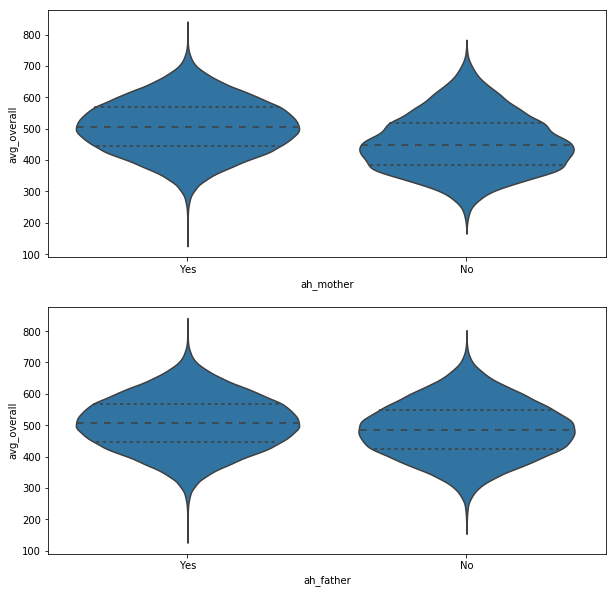

In [37]:
base_color = sb.color_palette()[0]

var_list = list(df_pc.columns.values)[55:57]
rows = int(len(var_list))
plt.figure(figsize = [10,rows*5])

for var in var_list:
    plt.subplot(rows, 1, var_list.index(var) +1)
    sb.violinplot(data = df_pc, x = var, y = 'avg_overall', color = base_color, inner = 'quartile')

If the mother is living at home this has a postiv impact on the PISA result. There is also a postive impact, when the father is living at home, but it is smaller.

In [38]:
#combining the columns 'ah_mother' and 'ah_father' into one new column 'ah_mother_father' for further analysis
new_column = []

for i, row in df_pc.iterrows():
    if row['ah_mother'] == 'Yes' and row['ah_father'] == 'Yes':
        new_column.append('both')
    elif row['ah_mother'] == 'Yes' and row['ah_father'] == 'No':
        new_column.append('mother')
    elif row['ah_mother'] == 'No' and row['ah_father'] == 'Yes':
        new_column.append('father')
    elif row['ah_mother'] == 'No' and row['ah_father'] == 'No':
        new_column.append('none')
    
df_pc['ah_mother_father'] = new_column 

In [39]:
df_pc['ah_mother_father'].unique()

array(['both', 'mother', 'none', 'father'], dtype=object)

In [40]:
order = ['none', 'father', 'mother', 'both']
new_class = pd.api.types.CategoricalDtype(ordered = True, categories = order)   
df_pc['ah_mother_father'] = df_pc['ah_mother_father'].astype(new_class)   

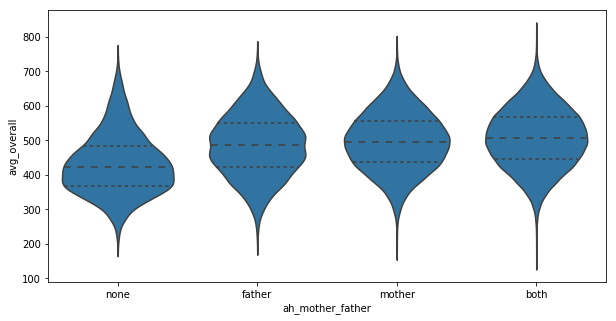

In [41]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10,5])
sb.violinplot(data = df_pc, x = 'ah_mother_father', y = 'avg_overall', color = base_color, inner = 'quartile');

Looking at the new combined column 'ah_mother_father' returns pretty much the same result as before. But it might be easier to use for further analysis.

Now, the OECD-status of the students country is set in relation to the PISA result.

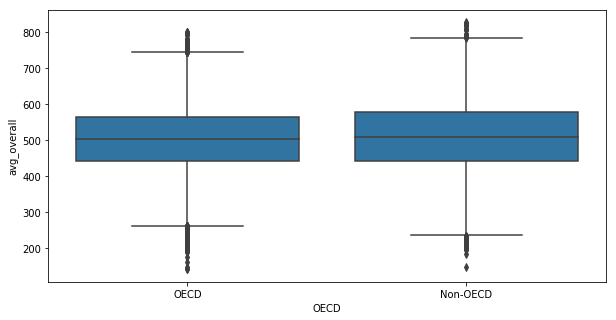

In [42]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10,5])
sb.boxplot(data = df_pc, x = 'OECD', y = 'avg_overall', color = base_color);

It doesn't really seem to have an impact on the mean of the overall PISA result, if a participant is living in an OECD or a Non-OECD country. The only difference is that the distribution of the results is slightly wider for the non-OECD countries.

As next step, I want o find out, if there are any interesting relationships between other features than the PISA result.

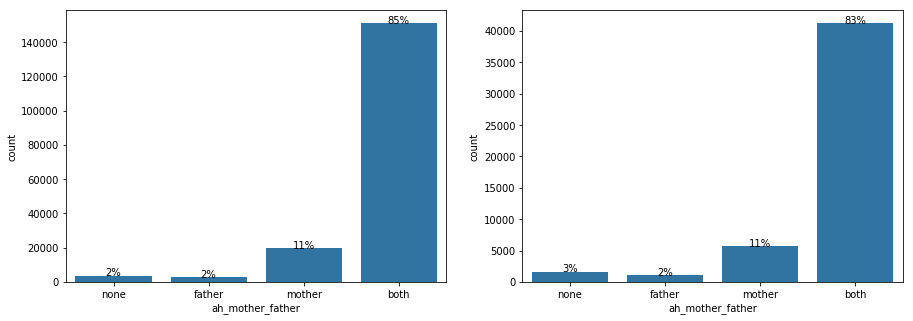

In [43]:
df_pc_OECD = df_pc[df_pc['OECD'] == 'OECD']
df_pc_nOECD = df_pc[df_pc['OECD'] == 'Non-OECD']

plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data = df_pc_OECD, x = 'ah_mother_father', color = base_color)
    
#add annotations
n_points = df_pc_OECD.shape[0]
cat_counts = df_pc_OECD['ah_mother_father'].value_counts()
locs, labels = plt.xticks()

#loop through each pair of location and label
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center')
    
plt.subplot(1,2,2)
sb.countplot(data = df_pc_nOECD, x = 'ah_mother_father', color = base_color)
    
#add annotations
n_points = df_pc_nOECD.shape[0]
cat_counts = df_pc_nOECD['ah_mother_father'].value_counts()
locs, labels = plt.xticks()

#loop through each pair of location and label
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center')

Comparing the presence of the parents in a household between OECD and Non-OECD countries doesn't bring any interesting results. The distribution is similar.

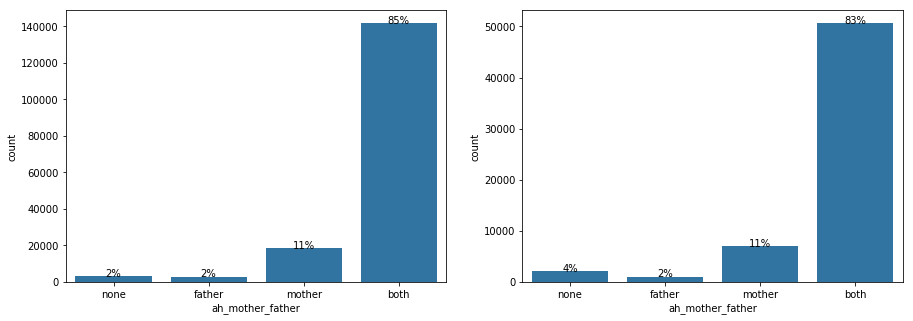

In [44]:
df_pc_fucy = df_pc.query('first_use_computer == "6 years old or younger" or first_use_computer == "7-9 years old"')
df_pc_fuco = df_pc.query('first_use_computer != "6 years old or younger" and first_use_computer != "7-9 years old"')

plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.countplot(data = df_pc_fucy, x = 'ah_mother_father', color = base_color)
    
#add annotations
n_points = df_pc_fucy.shape[0]
cat_counts = df_pc_fucy['ah_mother_father'].value_counts()
locs, labels = plt.xticks()

#loop through each pair of location and label
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center')
    
plt.subplot(1,2,2)
sb.countplot(data = df_pc_fuco, x = 'ah_mother_father', color = base_color)
    
#add annotations
n_points = df_pc_fuco.shape[0]
cat_counts = df_pc_fuco['ah_mother_father'].value_counts()
locs, labels = plt.xticks()

#loop through each pair of location and label
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center')

The doesn't seem to be a releationsship between the student's first use of a computer and if mother or father are living home.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

For all four calulated PISA results (math, reading, science and overall) the female students results are more concentrated in the middle of the distribution. In math and since the male students have slightly better results on average, whereas in the females reached better results in reading.

The use of the following electronic devices etc. at home has a positiv impact on the PISA results:
- internet connection
- printer
- usb

Whereas the use of the following electronic devices etc. at school has a negative impact on the PISA results:
- as_tablet_computer
- as_usb
- as_ebook_reader
- internet_at_school
- as_chat_online
- as_post_on_website
- as_simulations
- as_homework

It is visible in the data that the younger students were when they first used a computer, the better the results in the PISA test are.
Similar applies for the use of the internet. Students who were 9 years or younger when they first accessed the internet have the best PISA results.

If the mother is living at home this has a postiv impact on the PISA result. There is also a postive impact, when the father is living at home, but it is smaller. Best results were reached when both live with the students.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

As expected, there is a positive linear realtionsship between the three PISA results for math, reading and science.

For most of the categorical data there doesn't seem to be much of a relationship between them.

## Multivariate Exploration

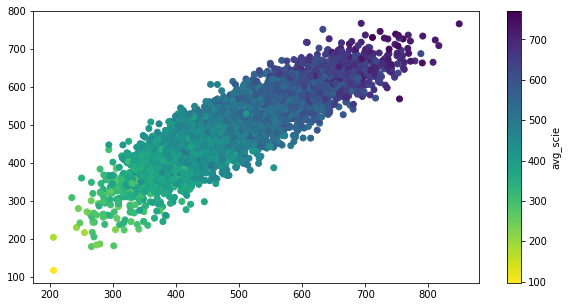

In [45]:
df_pc_sample = df_pc.sample(5000)
plt.figure(figsize = [10,5])
scat = plt.scatter(data = df_pc_sample, x = 'avg_math', y = 'avg_read', c = 'avg_scie', cmap = 'viridis_r')
cbar = plt.colorbar(scat);
cbar.ax.set_ylabel('avg_scie');

As already seen in the bivariate analysis, there is a linear relationship between all 3 results variables.

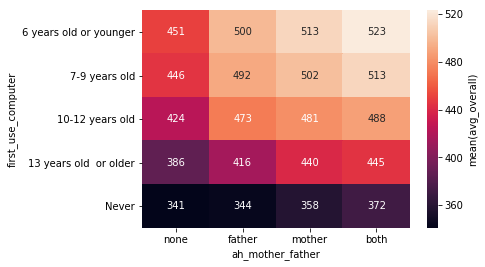

In [46]:
cat_means = df_pc.groupby(['ah_mother_father', 'first_use_computer']).mean()['avg_overall']
cat_means = cat_means.reset_index(name = 'avg_overall')
cat_means = cat_means.pivot(index = 'first_use_computer', columns = 'ah_mother_father', values = 'avg_overall')

sb.heatmap(cat_means, annot = True, fmt = '.0f', cbar_kws = {'label': 'mean(avg_overall)'});

In the above heatmap one can see that the age the student first used a computer and the presence of mother and father at home has a positive impact on the PISA result.

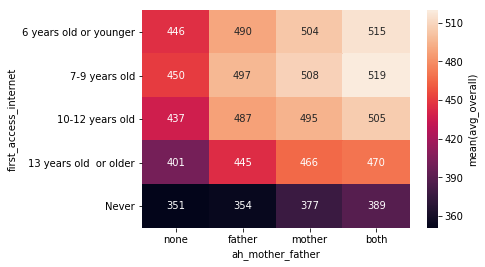

In [47]:
cat_means = df_pc.groupby(['ah_mother_father', 'first_access_internet']).mean()['avg_overall']
cat_means = cat_means.reset_index(name = 'avg_overall')
cat_means = cat_means.pivot(index = 'first_access_internet', columns = 'ah_mother_father', values = 'avg_overall')

sb.heatmap(cat_means, annot = True, fmt = '.0f', cbar_kws = {'label': 'mean(avg_overall)'});

This also applies for the first use of internet.

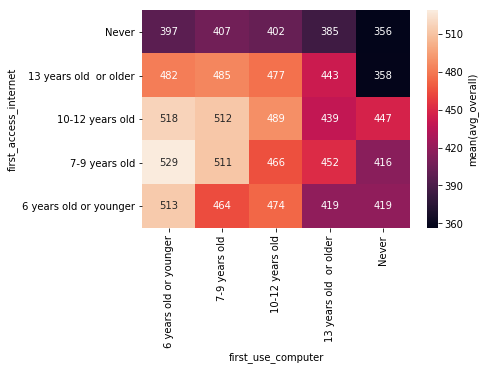

In [48]:
order = ['Never', '13 years old  or older', '10-12 years old', '7-9 years old', '6 years old or younger']
new_class = pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_pc['first_access_internet'] = df_pc['first_access_internet'].astype(new_class) 

cat_means = df_pc.groupby(['first_use_computer', 'first_access_internet']).mean()['avg_overall']
cat_means = cat_means.reset_index(name = 'avg_overall')
cat_means = cat_means.pivot(index = 'first_access_internet', columns = 'first_use_computer', values = 'avg_overall')

sb.heatmap(cat_means, annot = True, fmt = '.0f', cbar_kws = {'label': 'mean(avg_overall)'});

In general, one can say that an early use of computer and internet has a positive impact on the students PISA result.

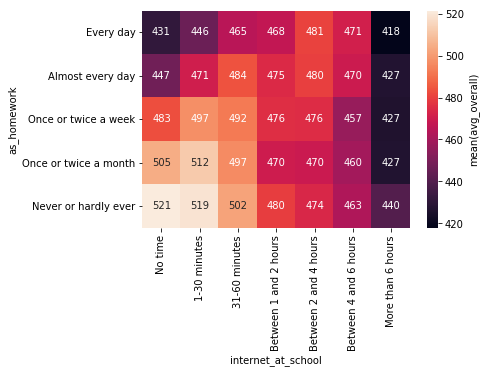

In [49]:
order = ['Every day', 'Almost every day', 'Once or twice a week', 'Once or twice a month', 'Never or hardly ever']
new_class = pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_pc['as_homework'] = df_pc['as_homework'].astype(new_class)

cat_means = df_pc.groupby(['internet_at_school', 'as_homework']).mean()['avg_overall']
cat_means = cat_means.reset_index(name = 'avg_overall')
cat_means = cat_means.pivot(index = 'as_homework', columns = 'internet_at_school', values = 'avg_overall')

sb.heatmap(cat_means, annot = True, fmt = '.0f', cbar_kws = {'label': 'mean(avg_overall)'});

Surprisingly, a higher frequency of doing homework on a school computer has a negative impact on the PISA result. The use of internet at school is as well not beneficial for the reults.

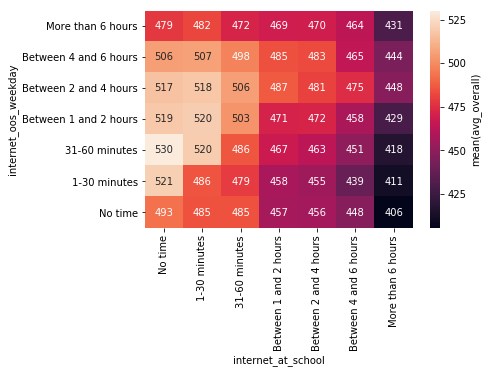

In [50]:
order = ['More than 6 hours', 'Between 4 and 6 hours', 'Between 2 and 4 hours', 'Between 1 and 2 hours',
         '31-60 minutes', '1-30 minutes', 'No time']
new_class = pd.api.types.CategoricalDtype(ordered = True, categories = order)
df_pc['internet_oos_weekday'] = df_pc['internet_oos_weekday'].astype(new_class) 

cat_means = df_pc.groupby(['internet_at_school', 'internet_oos_weekday']).mean()['avg_overall']
cat_means = cat_means.reset_index(name = 'avg_overall')
cat_means = cat_means.pivot(index = 'internet_oos_weekday', columns = 'internet_at_school', values = 'avg_overall')

sb.heatmap(cat_means, annot = True, fmt = '.0f', cbar_kws = {'label': 'mean(avg_overall)'});

As expected, the excessive use of internet doesn't have a postive impact on the PISA results. Surprisingly, the more minutes of internet access the students have in school the worse the results are. Even an amount of below 30 min is worse than not going to the internet at all.
On the other hand, a period of 31-60 min of internet assess out of school leads to the best results.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As already seen in the bivariate analysis, there is a linear relationship between all 3 results variables (math, reading and science).

In general, one can say that an early use of computer and internet has a positive impact on the students PISA result.

Surprisingly, a higher frequency of doing homework on a school computer has a negative impact on the PISA result. The usage of internet at school is as well not beneficial for the reults.

### Were there any interesting or surprising interactions between features?

As expected, the excessive use of internet doesn't have a postive impact on the PISA results. Surprisingly, the more minutes of internet access the students have in school the worse the results are. Even an amount of below 30 min is worse than not going to the internet at all.
On the other hand, a period of 31-60 min of internet assess out of school leads to the best results.